In [1]:
import tarfile
#import pandas as pd
from pathlib import Path
from collections import defaultdict
import numpy as np

### Part 1: Parsing the dataset

In [3]:
# with tarfile.open('review_polarity.tar.gz', 'r:gz') as tar:
#     tar.extractall()

In [2]:
neg_filepath = './txt_sentoken/neg'
pos_filepath = './txt_sentoken/pos'

In [3]:
results = defaultdict(list)

for file in Path(neg_filepath).iterdir():
    with open(file, "r") as file_open:
        results["text"].append(file_open.read())
        results["label"].append(-1)
        
for file in Path(pos_filepath).iterdir():
    with open(file, "r") as file_open:
        results["text"].append(file_open.read())
        results["label"].append(1)
        
#df = pd.DataFrame(results)

In [4]:
X_raw = np.array(results['text'])
y = np.array(results['label'])

In [5]:
assert np.all([type(x) == np.str_ for x in X_raw])
assert len(X_raw) == y.shape[0]
assert len(np.unique(y)) == 2
assert y.min() == -1
assert y.max() == 1

## Part 2: Feature extraction

In [6]:
import re

X_prac = X_raw.copy()
len_X_prac = len(X_prac)


def clean_text(sentence):
    sentence = re.sub(rf'[^a-zA-Z\s]','',sentence)
    sentence = re.sub(rf"\n", "", sentence)
    sentence = re.sub(rf"\s+", " ", sentence)
    sentence = re.sub(rf'\s+[a-zA-Z]\s+', ' ', sentence)
    return sentence 


for i, text in enumerate(X_prac):
    X_prac[i] = clean_text(text)

    
words = np.array([x.split() for x in X_prac], dtype=object)
flatten_words = np.concatenate(words)
vocab = set(flatten_words)
vocab_size = len(vocab)
ordered_vocab =sorted(list(vocab), reverse=False)

for i, w_list in enumerate(words):
    words[i] = set(w_list)
    

In [7]:
X = np.zeros((len_X_prac, vocab_size))
for i, w_list in enumerate(words):
    for j, v in enumerate(vocab):
        if v in w_list:
            X[i,j] = 1 

In [8]:
X.shape

(2000, 46786)

In [9]:
lut = dict()
for i, word in enumerate(ordered_vocab):
    lut[word] = i
    
for word in ['wifi', 'the', 'coffee']:
    if word in vocab:
        print("'%s' is represented as feature dimension %i" %(word, lut[word]))
    else:
        print("'%s' is not in the vocabulary" % word)

'wifi' is not in the vocabulary
'the' is represented as feature dimension 41496
'coffee' is represented as feature dimension 7377


In [10]:
print(ordered_vocab[2000:2010])
print(X[:10, 2000:2010])
for w in ['wifi', 'the', 'coffee']:
    print("'%s' in words: %s" % (w, w in vocab))

['arouses', 'arousing', 'aroway', 'arqua', 'arquette', 'arquettes', 'arraigned', 'arraki', 'arrakis', 'arrange']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
'wifi' in words: False
'the' in words: True
'coffee' in words: True


In [11]:
# pseudo input 1 
X = np.insert(X, 0, 1, axis=1)

# seperating train/test set 
x_train = np.vstack((X[0:800], X[1000:1800]))
y_train = np.hstack((y[0:800], y[1000:1800]))
x_test = np.vstack((X[800:1000], X[1800:2000]))
y_test = np.hstack((y[800:1000], y[1800:2000]))

In [15]:
X.shape

(2000, 46787)

In [240]:
import numpy as np
class SVM_Classifier:   
     
    
    def __init__(self, weight=None, learning_rate=0.001, l2_lambda=0.001):
        self.weight = weight
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
    
    
    def predict(self, w, X):
        l = [i for i in np.dot(X, w)]
        tmp = np.sign(l)
        res = np.array([i for i in tmp])
        
        return res 
        
    def dot_matrix(self, w, X):
        l = [i for i in np.dot(X, w)]
        res = np.array([i for i in l])

        return res 
    
    def hinge_loss_matrix(self, X, labels, w):
        y_hat = self.dot_matrix(w, X)
        sum_hinge = 0
        len_of_matrix = len(X)
        for i in range(len_of_matrix):
            margins = np.max([0.0, 1 - labels[i] * y_hat[i]])
            sum_hinge += margins 
        
        return sum_hinge 
    
    def l2_regularization(self, w):
        sum_w = np.sum(np.square(w))
        l2 = (self.l2_lambda / 2) * sum_w
        
        return l2
    
    
    def hinge_loss_function(self, X, labels, w):
        loss = self.hinge_loss_matrix(X, labels, w)
        l2 = self.l2_regularization(w)
        total = loss + l2
        
        return total 
    
    def gradient(self, X, labels, w):
        sub_grad = 0
        for x_i, y_i in zip(X, labels):
            g = np.dot(x_i, w)
            if y_i * g < 1:
                sub_grad += -y_i * x_i
            else:
                sub_grad += 0
                
        return sub_grad 
    
    def add_weight(self, w, subgrad_w):
        subgrad_w = np.array(subgrad_w).reshape(-1, 1) #to get the same shape
        return w + subgrad_w 

    
    def gradient_descent(self, X, labels, w):
        sub_grads = self.gradient(X, labels, w)
        addweight = self.add_weight(w, sub_grads)
        w = w - self.learning_rate * np.array(addweight).reshape(-1, 1)
  
        return w

    

    def fit(self, X, labels):
        self.weight = np.random.randn(len(X_prac[0])).reshape(-1,1)        
        best_loss = -1 # initial best loss
        count = 0
        epoch = 0 
        min_epoch = 200
        print(f'initial weight: {self.weight}')
        while True:
            if best_loss == -1: # initial loss 
                loss = self.hinge_loss_function(X, labels, self.weight)
                best_loss = loss
                self.weight = self.gradient_descent(X, labels, self.weight)       
                loss = self.hinge_loss_function( X, labels, self.weight)
                epoch += 1
                
            else:
                if loss > best_loss - 0.001 :
                    if epoch < min_epoch:
                        epoch += 1 
                        loss = self.hinge_loss_function( X_prac, labels, self.weight)
                        best_loss = loss
                        self.weight = self.gradient_descent( X, labels, self.weight)
                        loss = self.hinge_loss_function( X, labels, self.weight)
                        count += 1
                    else:
                        if count > 5:
                            break
                    
                elif loss <= best_loss - 0.001 :
                    epoch += 1
                    loss = self.hinge_loss_function( X_prac, labels, self.weight)
                    best_loss = loss
                    self.weight = self.gradient_descent( X, labels, self.weight)
                    loss = self.hinge_loss_function( X, labels, self.weight)
    
        return loss

    
    def score(self, X, labels):
        y_hat = self.predict(self.weight, X)
        training_accuracy = np.sum(y_hat == labels) / len(labels)
        
        return training_accuracy
        

In [241]:
# w = np.array([[0] for i in range(len(x_train[0]))])

X_prac = x_train
labels = y_train
# l = [i[0] for i in np.dot(x, w)]

In [242]:
model = SVM_Classifier()
model.fit(X_prac, labels)

initial weight: [[-2.21778144]
 [-0.63283712]
 [-1.31049509]
 ...
 [ 0.57774988]
 [ 0.07483949]
 [-1.32356753]]
epoch: initial	loss: [11423.66331405]
epoch: 1	loss: [11010.49180514]
epoch: 50	loss: [3042.00376124]
epoch: 100	loss: [882.49594898]
epoch: 150	loss: [78.49724563]
epoch: 200	loss: [28.27511276]


In [234]:
model.predict(model.weight, X_prac)

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [235]:
omega = model.weight
omega

array([[ 1.6672467 ],
       [ 1.66933111],
       [-0.82894331],
       ...,
       [-1.61481584],
       [-0.37226731],
       [ 0.22460575]])

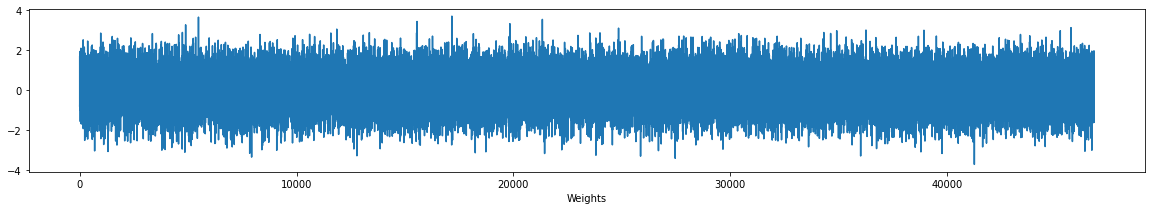

In [236]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(omega[1:])
plt.xlabel("Value")
plt.xlabel("Weights")
plt.show()

In [279]:
assert (len(omega)-1) == len(vocab)
idx = np.argsort(np.abs(omega[1:]))

In [280]:
omega = omega.reshape(-1)
voca = list(vocab)
idx = np.argsort(np.abs(omega))
print("                Word   Weight  Occurences")
for i in idx[-20:]:   # Pick those with highest 'voting' values
    print("%20s   %.3f\t%i " % (voca[i], omega[i+1], np.sum([voca[i] in d for d in X_raw])))

                Word   Weight  Occurences
     representations   0.779	1 
           soporific   0.287	1 
          summations   -0.297	1 
             standup   -2.444	5 
                tips   0.467	17 
        suspiciously   1.291	8 
                   s   0.774	2000 
             numbing   -0.621	22 
           injection   2.191	7 
              raptor   0.246	7 
    constructedharry   -0.309	0 
        severalscene   0.821	0 
                bots   -0.458	22 
            cauldron   -0.451	7 
        readaptation   -0.203	0 
                 coy   0.904	21 
                 jet   -0.238	52 
            villiany   2.313	1 
              susans   -1.050	0 
          deployment   -0.218	1 


In [115]:
from sklearn.linear_model import SGDClassifier

# Set hyperparameters (these variables are only here for clarity)
reguliser_dampening = 0.001   # lambda
learning_rate = .1            # gamma

# Create the untrained classifier
model = SGDClassifier(loss='hinge', penalty='l2',
                      alpha=reguliser_dampening, verbose=1,
                      learning_rate='constant', eta0=learning_rate)

# Train the classifier
model.fit(X_prac, labels)

-- Epoch 1
Norm: 31.28, NNZs: 23908, Bias: -0.100000, T: 1600, Avg. loss: 1.757959
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 32.78, NNZs: 27541, Bias: -0.300000, T: 3200, Avg. loss: 0.519560
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 31.45, NNZs: 28851, Bias: -0.200000, T: 4800, Avg. loss: 0.158868
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 29.37, NNZs: 29595, Bias: -0.300000, T: 6400, Avg. loss: 0.096802
Total training time: 0.29 seconds.
-- Epoch 5
Norm: 27.21, NNZs: 30042, Bias: -0.300000, T: 8000, Avg. loss: 0.071565
Total training time: 0.36 seconds.
-- Epoch 6
Norm: 26.41, NNZs: 30708, Bias: -0.200000, T: 9600, Avg. loss: 0.105765
Total training time: 0.42 seconds.
-- Epoch 7
Norm: 26.24, NNZs: 31256, Bias: -0.400000, T: 11200, Avg. loss: 0.098563
Total training time: 0.49 seconds.
-- Epoch 8
Norm: 26.12, NNZs: 31642, Bias: -0.400000, T: 12800, Avg. loss: 0.108393
Total training time: 0.56 seconds.
-- Epoch 9
Norm: 26.00, NNZs: 32097, Bias: -0.300000, 

SGDClassifier(alpha=0.001, eta0=0.1, learning_rate='constant', verbose=1)

In [274]:
weight = model.weight
len(vocab)

46786

In [275]:
len(weight)

46787

In [116]:
# Get the parameter vector
omega_sckit = np.concatenate([model.intercept_, model.coef_.ravel()])

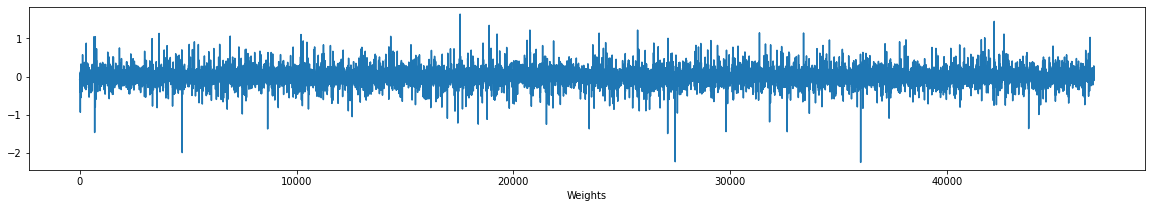

In [119]:
plt.figure(figsize=(20, 3))
plt.plot(omega_sckit[1:])
plt.xlabel("Value")
plt.xlabel("Weights")
plt.show()

## Part 4: Exploring hyperparameters

In [283]:
learning_rate = np.exp(np.linspace(np.log(0.0001), np.log(3), 10))
reguliser_dampening = np.exp(np.linspace(np.log(0.0001), np.log(3), 10))

In [284]:
for lr in learning rate:
    for 

array([1.00000000e-04, 3.14382177e-04, 9.88361533e-04, 3.10723251e-03,
       9.76858520e-03, 3.07106908e-02, 9.65489385e-02, 3.03532655e-01,
       9.54252568e-01, 3.00000000e+00])